# Hypothesis Generation
### Some of the factors that we can think of that can influence the price of Houses are: 
### - Area of the House.
### - Number of rooms it has.
### - The Type of property.
### - Location of the house.
### - Resale value. 
### - If the house is ready to move in.

### There are many more important factors that we can think of, but considering the data available, the above mentioned factors are some that we can come up with.


# Data Exploration
### Data Exploration is the key of getting insights from data. Some of the good data exploration strategies are:
### - **Univariate Analysis** - It is used to visualize one variable in one plot. Examples: histogram, density plot, etc.
### - **Bivariate Analysis** - It is used to visualize two variables (x and y axis) in one plot. Examples: bar chart, line chart, area chart, etc.
### - **Multivariate Analysis** - As the name suggests, it is used to visualize more than two variables at once. Examples: stacked bar chart, dodged bar chart, etc.
### - **Cross Tables** -They are used to compare the behavior of two categorical variables (used in pivot tables as well).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train.head(2)

POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0     Owner                   0     0        2       BHK  1300.236407   
1    Dealer                   0     0        2       BHK  1275.000000   

   READY_TO_MOVE  RESALE                    ADDRESS  LONGITUDE   LATITUDE  \
0              1       1      Ksfc Layout,Bangalore  12.969910  77.597960   
1              1       1  Vishweshwara Nagar,Mysore  12.274538  76.644605   

   TARGET(PRICE_IN_LACS)  
0                   55.0  
1                   51.0

In [4]:
print("There are {} rows and {} columns in train dataset".format(df_train.shape[0], df_train.shape[1]) )

There are 29451 rows and 12 columns in train dataset


## Let's check the data set information using info() command

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           68720 non-null  object 
 1   UNDER_CONSTRUCTION  68720 non-null  int64  
 2   RERA                68720 non-null  int64  
 3   BHK_NO.             68720 non-null  int64  
 4   BHK_OR_RK           68720 non-null  object 
 5   SQUARE_FT           68720 non-null  float64
 6   READY_TO_MOVE       68720 non-null  int64  
 7   RESALE              68720 non-null  int64  
 8   ADDRESS             68720 non-null  object 
 9   LONGITUDE           68720 non-null  float64
 10  LATITUDE            68720 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 5.8+ MB


## As we can see, there is no null value in the data set.

## Let's rename the columns.

In [7]:
df_train = df_train.rename(columns={"POSTED_BY":"posted_by","BHK_NO.":"rooms","BHK_OR_RK": "property", "SQUARE_FT": "area", "READY_TO_MOVE":"ready_to_move", "RESALE": "resale", "UNDER_CONSTRUCTION": "under_construction", "RERA": "rera_certified", "ADDRESS": "location", "LONGITUDE": "longitude", "LATITUDE":"latitude", "TARGET(PRICE_IN_LACS)": "price(lakhs)"})

df_test = df_test.rename(columns={"POSTED_BY":"posted_by","BHK_NO.":"rooms","BHK_OR_RK": "property", "SQUARE_FT": "area", "READY_TO_MOVE":"ready_to_move", "RESALE": "resale", "UNDER_CONSTRUCTION": "under_construction", "RERA": "rera_certified", "ADDRESS": "location", "LONGITUDE": "longitude", "LATITUDE":"latitude"})

print("Train data: \n {}".format(df_train.head(1)))
print("===========================")
print("Test data: \n {}".format(df_test.head(1)))

Train data: 
   posted_by  under_construction  rera_certified  rooms property         area  \
0     Owner                   0               0      2      BHK  1300.236407   

   ready_to_move  resale               location  longitude  latitude  \
0              1       1  Ksfc Layout,Bangalore   12.96991  77.59796   

   price(lakhs)  
0          55.0  
Test data: 
   posted_by  under_construction  rera_certified  rooms property       area  \
0     Owner                   0               0      1      BHK  545.17134   

   ready_to_move  resale      location  longitude  latitude  
0              1       1  Kamrej,Surat     21.262   73.0477  


## Let's proceed and check the distribution of the target variable.

E:\programs\anaconda\envs\virtual_workspace\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


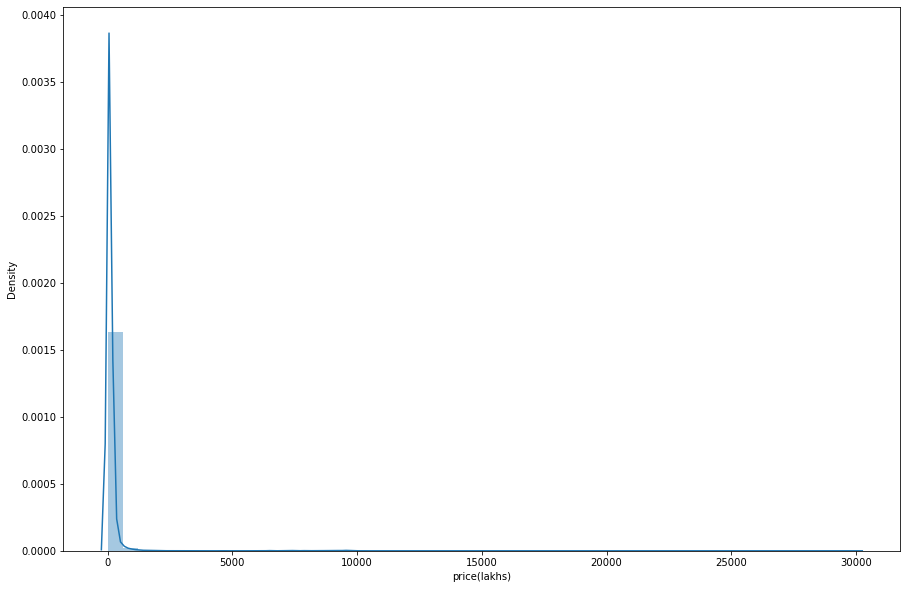

In [8]:
plt.figure(figsize=(15,10))
sns.distplot(df_train['price(lakhs)'])
plt.show()

## We can see that the target variable price(lakhs) has a right-skewed distribution and it is very narrow. So we will have to log transform the variable so that it becomes normally distributed.

## we can see the skewness using **skew()** command.

In [9]:
print("The skewness of the price(lakhs) is {}".format(df_train['price(lakhs)'].skew()))

The skewness of the price(lakhs) is 17.58333227553508


## Let's log transform the target variable using **np.log()** command and see if it can get any closer to normal distribution.

In [10]:
# Log tranformation

target = np.log(df_train['price(lakhs)'])
print("Skewness is", target.skew())


Skewness is 1.1344393433273732


E:\programs\anaconda\envs\virtual_workspace\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


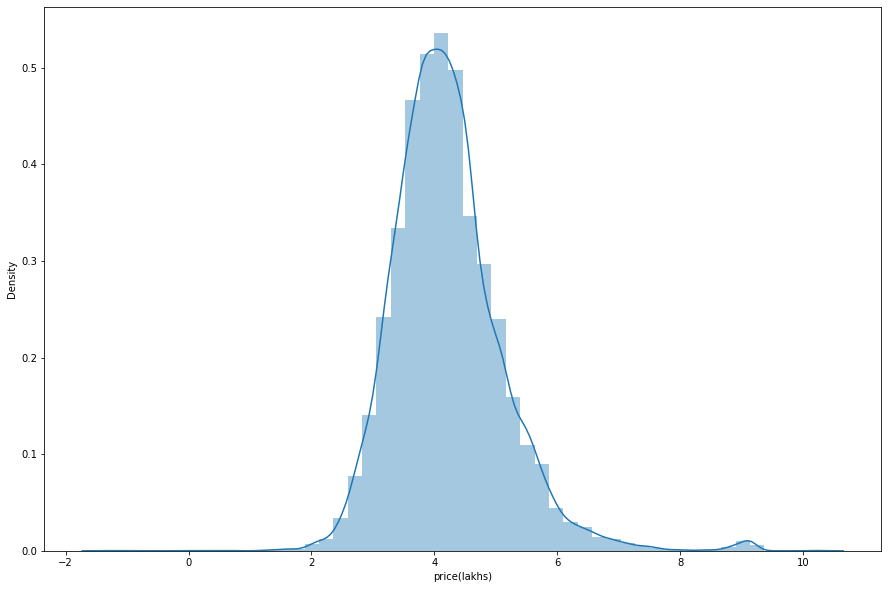

In [11]:
plt.figure(figsize=(15,10))
sns.distplot(target)
plt.show()

## As we can see, **log transformation** of the target variable has helped us fixing its skewed distribution and the new distribution looks closer to normal.

## Now, we are interested in learning about the correlation of the dependent variables.

In [13]:
df2 = df_train.copy()

In [14]:
df2["location"] = df2["location"].str.split(",").apply(lambda  x: x[-1])
df2.head(2)

posted_by  under_construction  rera_certified  rooms property         area  \
0     Owner                   0               0      2      BHK  1300.236407   
1    Dealer                   0               0      2      BHK  1275.000000   

   ready_to_move  resale   location  longitude   latitude  price(lakhs)  
0              1       1  Bangalore  12.969910  77.597960          55.0  
1              1       1     Mysore  12.274538  76.644605          51.0

<AxesSubplot:xlabel='area', ylabel='price(lakhs)'>

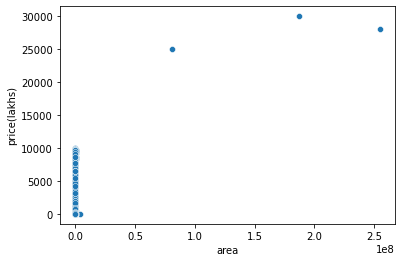

In [17]:
sns.scatterplot(x='area', y='price(lakhs)', data=df3)

## Now let us check the categorial variable i.e **property**

In [18]:
sp_pivot = df2.pivot_table(index='property', values='price(lakhs)', aggfunc=np.median)
sp_pivot

price(lakhs)
property              
BHK              62.00
RK               42.45

<AxesSubplot:xlabel='property'>

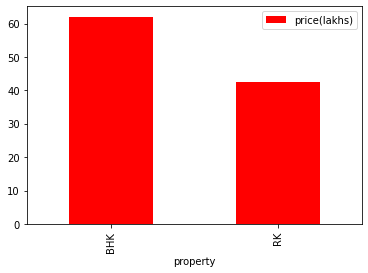

In [19]:

sp_pivot.plot(kind='bar', color='red')

## We can see that BHK has the higher mean price and RK. BHK means Bedroom, Hall, Kitchen and RK means one Bedroom hall and separate kitchen. Price of houses with more number of rooms has higher price compared to rooms with combined romms.

## Now we shall check the influence of the **location** on the price of the house.

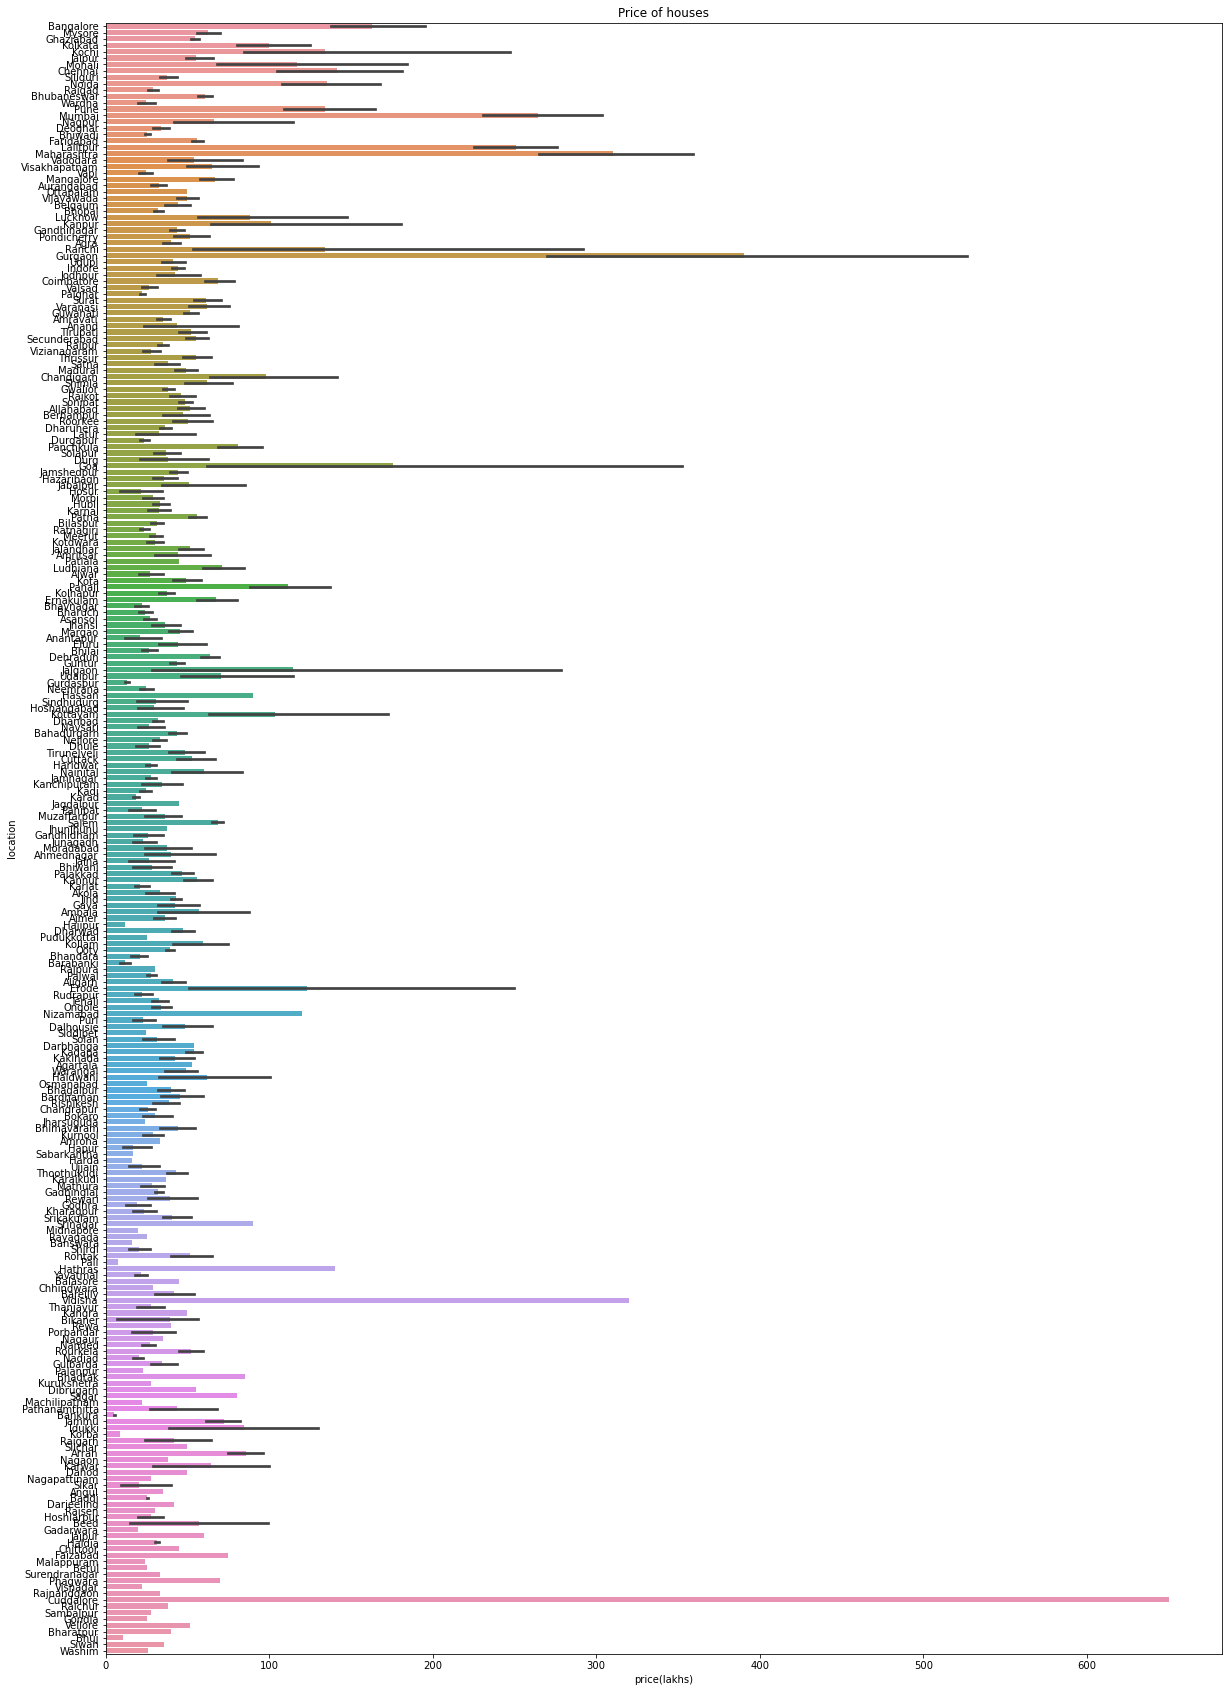

In [20]:
plt.figure(figsize=(20,30) )
sns.barplot(y='location',x="price(lakhs)", data=df2)
plt.title('Price of houses')
plt.show()

## Now we shall check the influence of the cateforical values on the target variable.

In [23]:
cat = [x for x in df2.columns if df2.dtypes[x] == 'object']
cat

['posted_by', 'property', 'location']

In [24]:
cat_data = df2.select_dtypes(exclude=[np.number])
cat_data.head(2)

posted_by property   location
0     Owner      BHK  Bangalore
1    Dealer      BHK     Mysore

In [25]:
from scipy import stats
from scipy.stats import norm

In [26]:

def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['price(lakhs)'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

<ipython-input-28-ee5218ea9027>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['price(lakhs)'] = df2["price(lakhs)"].values


<module 'matplotlib.pyplot' from 'E:\\programs\\anaconda\\envs\\virtual_workspace\\lib\\site-packages\\matplotlib\\pyplot.py'>

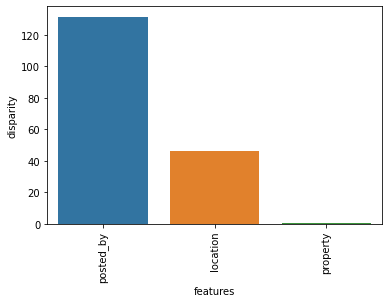

In [28]:
cat_data['price(lakhs)'] = df2["price(lakhs)"].values
k = anova(cat_data) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt 

## Here we can see that among all the three categorical variables, **posted_by** turned out to be the most important feature followed by location. This means that people also consider the person who posted the property for sale. If the person is the Dealer, Owner or Builder. 
## Now let's create boxplots for visualizing the categorical variables.

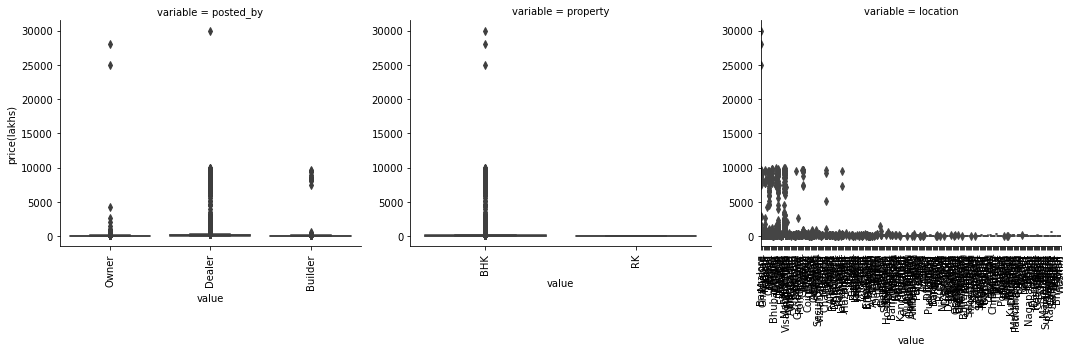

In [31]:
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in df2.columns if df2.dtypes[f] == 'object']

p = pd.melt(df2, id_vars='price(lakhs)', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(boxplot, 'value','price(lakhs)')
g

## Now we plot the numerical variables

E:\programs\anaconda\envs\virtual_workspace\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\programs\anaconda\envs\virtual_workspace\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\programs\anaconda\envs\virtual_workspace\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

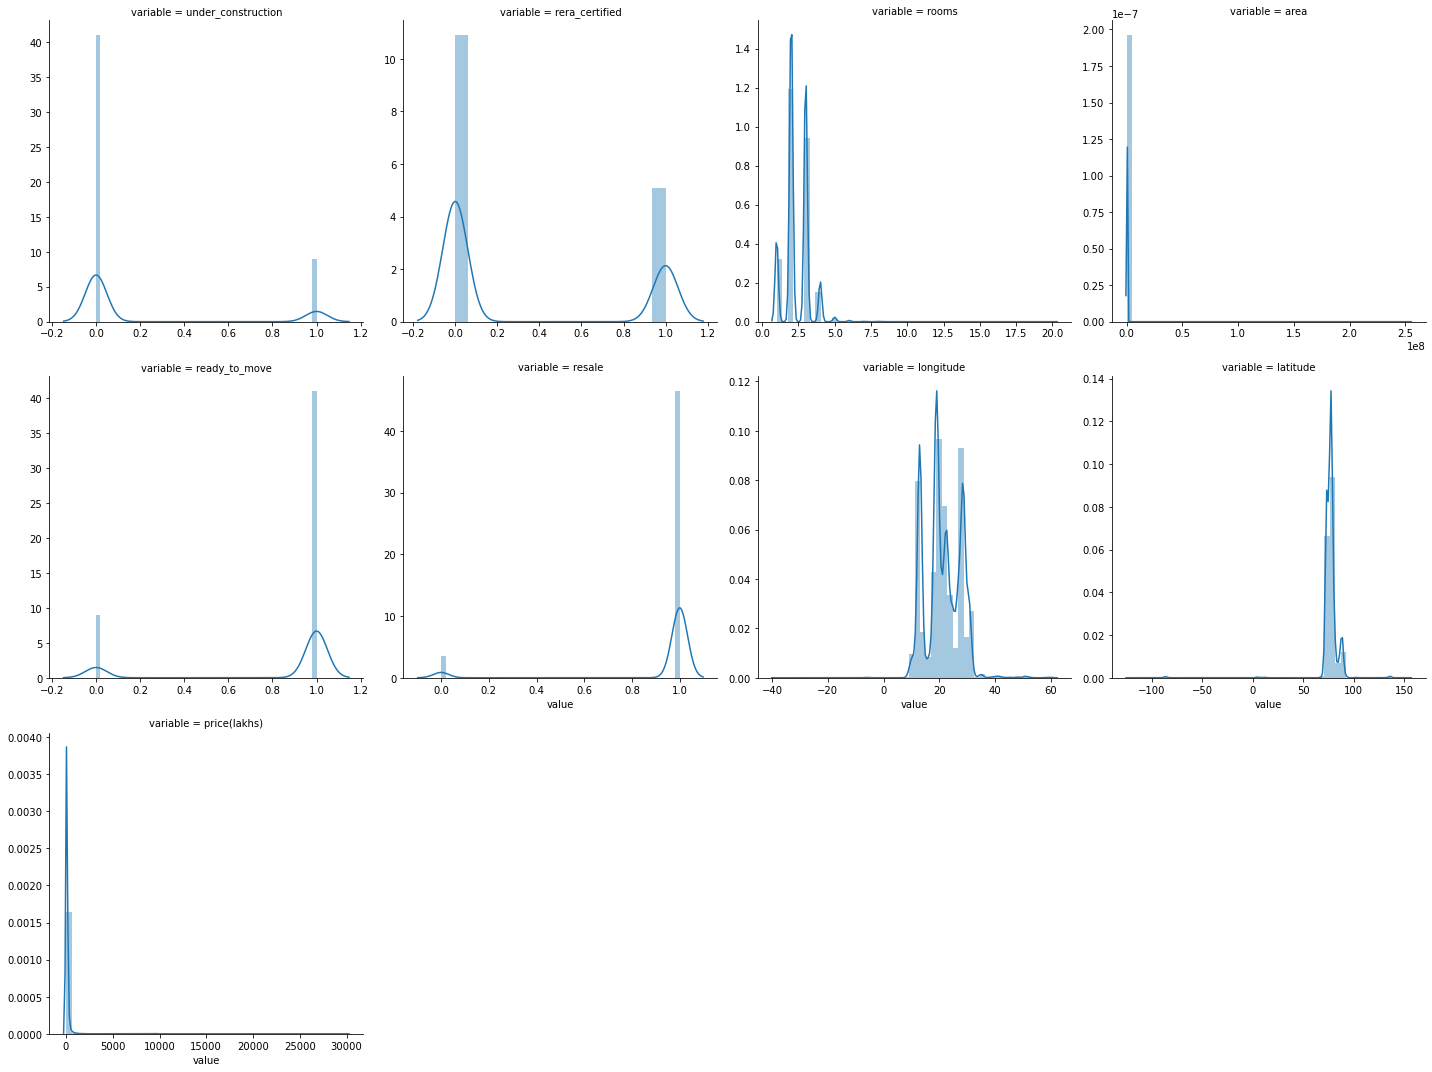

In [32]:
num = [f for f in df2.columns if df2.dtypes[f] != 'object']
nd = pd.melt(df2, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False, height=5)
n1 = n1.map(sns.distplot, 'value')
n1

## Log-transformation is required for a good visualization of the numerical variables.

# Feature Engineering

## To select the fetures that influence the target variable, we use **corr()** command to look into the relationship of the dependent variables with the target variable.

## We use **heatmap** for a proper visual representation of the correlation of the variables.

<AxesSubplot:>

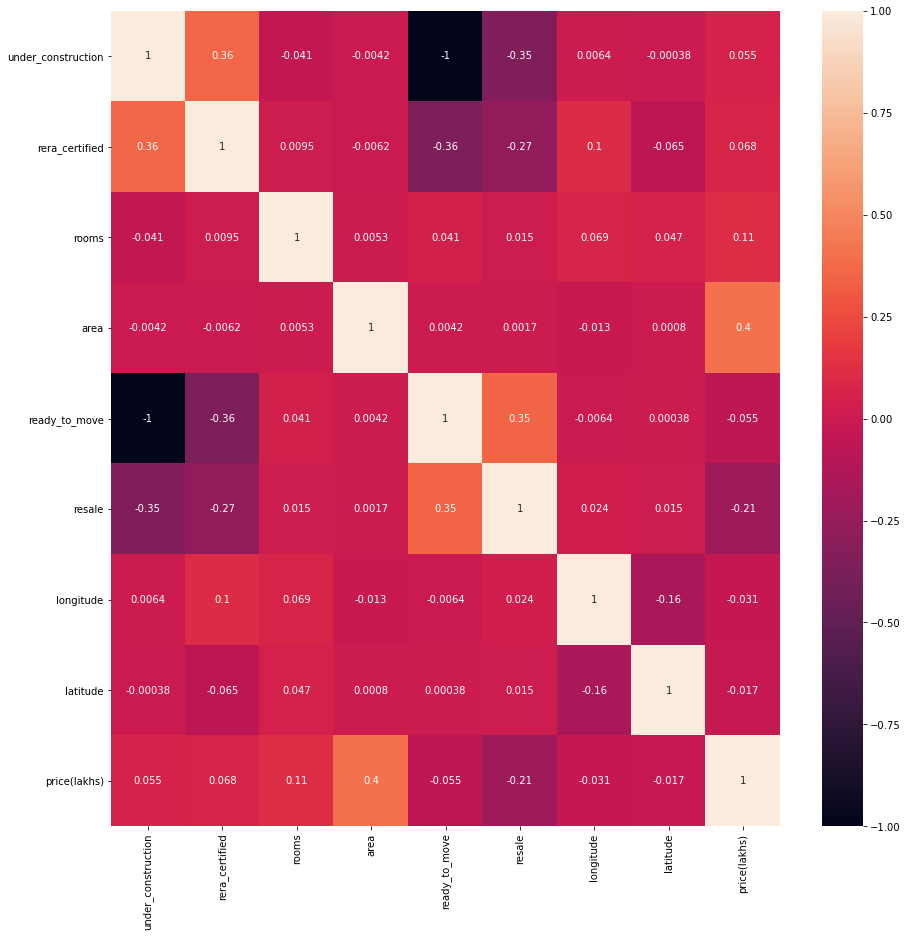

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(), vmin = -1, vmax = +1, annot = True)

In [17]:
print(df2.corr()['price(lakhs)'].sort_values(ascending = False))

price(lakhs)          1.000000
area                  0.402685
rooms                 0.112283
rera_certified        0.067636
under_construction    0.055399
latitude             -0.017254
longitude            -0.031112
ready_to_move        -0.055399
resale               -0.207378
Name: price(lakhs), dtype: float64


## We can see that out of all the variables, **area** is 40% correlated with the target variable i.e **price(lakhs)**. This shows that people cares about the space of their houses and consider buying houses that has more area even if the price is high. Also we can see that **latitude**, **longitude**, **ready_to_move**, **under_construction**, **rera_certified** has very little influence on the **price(lakhs)**. So we can ingnore these variables and reduce the dimension. 

# Data Preprocessing

## Let's consider only those variables that influence the target variable and drop the rest from the data set.

In [34]:
df3 = df2.drop(columns=['location', 'longitude', 'latitude', 'ready_to_move', 'under_construction', 'rera_certified'], axis=1)
df3.head(1)

posted_by  rooms property         area  resale  price(lakhs)
0     Owner      2      BHK  1300.236407       1          55.0

## We encode all the categorical variables using **LabelEncoder**.


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def factorize(data, var, fill_na = None):
      if fill_na is not None:
            data[var].fillna(fill_na, inplace=True)
      le.fit(data[var])
      data[var] = le.transform(data[var])
      return data

In [41]:
# for train data
df4 = factorize(df3, "posted_by")
df4 = factorize(df4, 'property')


df4.head(2)

posted_by  rooms  property         area  resale  price(lakhs)
0          2      2         0  1300.236407       1          55.0
1          1      2         0  1275.000000       1          51.0

In [40]:
df4.shape

(29451, 6)

## Now lets us check for outliers in the dependent variables using **boxplot**.

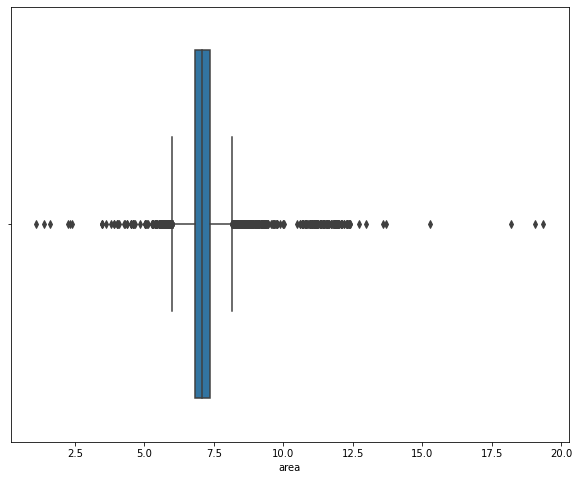

In [48]:
# sns.boxplot(x=np.log(df4['area']))
# sns.boxplot(x=df4['rooms'])
# sns.boxplot(x=df4['property'])
# sns.boxplot(x=df4['posted_by'])

# for feature in df4.columns:
#     plt.figure(figsize=(10,8))
#     sns.boxplot(x = df4[feature])
#     plt.show()

## After checking through all the features, area is found to have the more number of outliers. So we log transfrom the area feature for better visualization.
log_area = np.log(df4['area'])

plt.figure(figsize=(10,8))
sns.boxplot(x=log_area)
plt.show()


## We can see that there are outliers in area feature. We can remove these outliers using **IQR**(Interquantile Range) method.

In [49]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(df4, "area")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  2526.6886156
Lower Whisker:  -75.97936200000004


In [52]:
df4[(df4['area'] < lower) | (df4['area'] > upper)].shape

(1635, 6)

## There area 1635 outliers in the data set.

## Anything lying outside between 2526.68 and -75.97 are outliers. So we remove them from the dataset.

In [50]:
df5 = df4[(df4['area'] > lower) & (df4['area'] < upper)]
df5.shape

(27816, 6)

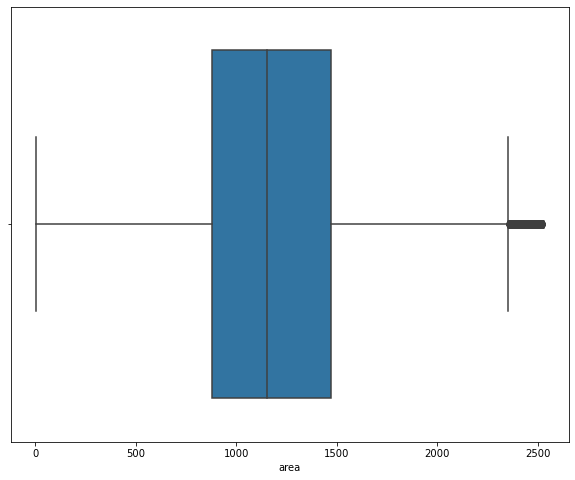

In [54]:


plt.figure(figsize=(10,8))
sns.boxplot(x=df5['area'])
plt.show()

In [55]:
X = df5.drop(columns='price(lakhs)', axis=1)
X.head(2)

posted_by  rooms  property         area  resale
0          2      2         0  1300.236407       1
1          1      2         0  1275.000000       1

In [56]:
y = df5['price(lakhs)']
y.shape

(27816,)

# Model Training

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [58]:
scaled_data

array([[ 1.25600302, -0.40761139, -0.02938635,  0.24105743,  0.26599281],
       [-0.67059784, -0.40761139, -0.02938635,  0.18515395,  0.26599281],
       [ 1.25600302, -0.40761139, -0.02938635, -0.57208772,  0.26599281],
       ...,
       [-0.67059784, -0.40761139, -0.02938635, -0.37386843,  0.26599281],
       [ 1.25600302, -0.40761139, -0.02938635, -0.58555766,  0.26599281],
       [-0.67059784, -0.40761139, -0.02938635, -0.65268863,  0.26599281]])

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.33, random_state=42)

In [72]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 40)
regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=40)

In [73]:
regressor.score(X_train, y_train)

0.782858484438501

In [74]:
y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
print("score: ", np.sqrt(mean_squared_error(y_test, y_pred)))



score:  95.74212702707784


## Now let's try with Lasso 

In [75]:
from sklearn.linear_model import Lasso
reg = Lasso().fit(X_train, y_train)
reg.score(X_train, y_train)

0.15375791874100053

In [76]:
y_pred = reg.predict(X_test)
from sklearn.metrics import mean_squared_error
print("score: ", np.sqrt(mean_squared_error(y_test, y_pred)))

score:  96.98552866303096


## There is plenty of room for model improvement. And using cross-validaton, hyperparameter tuning the model can be made to perform better than it's current performance.